<a href="https://colab.research.google.com/github/Annoymous-bot/DA-/blob/main/DA_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. Clean and perform steps of Wrangling.


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt



In [ ]:
df = pd.read_csv("/content/sample_data/earthquake.csv - earthquake.csv.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23412 entries, 0 to 23411
Data columns (total 21 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Date                        23412 non-null  object 
 1   Time                        23412 non-null  object 
 2   Latitude                    23412 non-null  float64
 3   Longitude                   23412 non-null  float64
 4   Type                        23412 non-null  object 
 5   Depth                       23412 non-null  float64
 6   Depth Error                 4461 non-null   float64
 7   Depth Seismic Stations      7097 non-null   float64
 8   Magnitude                   23412 non-null  float64
 9   Magnitude Type              23409 non-null  object 
 10  Magnitude Error             327 non-null    float64
 11  Magnitude Seismic Stations  2564 non-null   float64
 12  Azimuthal Gap               7299 non-null   float64
 13  Horizontal Distance         160

In [ ]:
df1 = df.drop(columns=['Depth Error', 'Depth Seismic Stations', 'Magnitude Error', 'Magnitude Seismic Stations', 'Azimuthal Gap','Horizontal Distance','Horizontal Error'])
df1

,Date,Time,Latitude,Longitude,Type,Depth,Magnitude,Magnitude Type,Root Mean Square,ID,Source,Location Source,Magnitude Source,Status
0,02/01/1965,13:44:18,19.2460,145.6160,Earthquake,131.60,6.0,MW,NaN,ISCGEM860706,ISCGEM,ISCGEM,ISCGEM,Automatic
1,04/01/1965,11:29:49,1.8630,127.3520,Earthquake,80.00,5.8,MW,NaN,ISCGEM860737,ISCGEM,ISCGEM,ISCGEM,Automatic
2,05/01/1965,18:05:58,-20.5790,-173.9720,Earthquake,20.00,6.2,MW,NaN,ISCGEM860762,ISCGEM,ISCGEM,ISCGEM,Automatic
3,08/01/1965,18:49:43,-59.0760,-23.5570,Earthquake,15.00,5.8,MW,NaN,ISCGEM860856,ISCGEM,ISCGEM,ISCGEM,Automatic
4,09/01/1965,13:32:50,11.9380,126.4270,Earthquake,15.00,5.8,MW,NaN,ISCGEM860890,ISCGEM,ISCGEM,ISCGEM,Automatic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23407,12/28/2016,8:22:12,38.3917,-118.8941,Earthquake,12.30,5.6,ML,0.1898,NN00570710,NN,NN,NN,Reviewed
23408,12/28/2016,9:13:47,38.3777,-118.8957,Earthquake,8.80,5.5,ML,0.2187,NN00570744,NN,NN,NN,Reviewed
23409,12/28/2016,12:38:51,36.9179,140.4262,Earthquake,10.00,5.9,MWW,1.5200,US10007NAF,US,US,US,Reviewed
23410,12/29/2016,22:30:19,-9.0283,118.6639,Earthquake,79.00,6.3,MWW,1.4300,US10007NL0,US,US,US,Reviewed


In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23412 entries, 0 to 23411
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Date              23412 non-null  object 
 1   Time              23412 non-null  object 
 2   Latitude          23412 non-null  float64
 3   Longitude         23412 non-null  float64
 4   Type              23412 non-null  object 
 5   Depth             23412 non-null  float64
 6   Magnitude         23412 non-null  float64
 7   Magnitude Type    23409 non-null  object 
 8   Root Mean Square  17352 non-null  float64
 9   ID                23412 non-null  object 
 10  Source            23412 non-null  object 
 11  Location Source   23412 non-null  object 
 12  Magnitude Source  23412 non-null  object 
 13  Status            23412 non-null  object 
dtypes: float64(5), object(9)
memory usage: 2.5+ MB


In [ ]:
df1[df1['Magnitude Type'].isnull()]


,Date,Time,Latitude,Longitude,Type,Depth,Magnitude,Magnitude Type,Root Mean Square,ID,Source,Location Source,Magnitude Source,Status
6703,08/24/1983,13:36:00,40.3732,-124.9227,Earthquake,11.93,5.70,NaN,NaN,ATLAS19830824133600,ATLAS,ATLAS,ATLAS,Automatic
7294,11/23/1984,18:08:00,37.4600,-118.5900,Earthquake,9.00,5.82,NaN,NaN,ATLAS19841123180800,ATLAS,ATLAS,ATLAS,Automatic
7919,03/31/1986,11:55:00,37.4788,-121.6858,Earthquake,9.17,5.60,NaN,NaN,ATLAS19860331115500,ATLAS,ATLAS,ATLAS,Automatic


In [ ]:
df1[df1['Root Mean Square'].isnull()]

,Date,Time,Latitude,Longitude,Type,Depth,Magnitude,Magnitude Type,Root Mean Square,ID,Source,Location Source,Magnitude Source,Status
0,02/01/1965,13:44:18,19.246,145.616,Earthquake,131.6,6.0,MW,NaN,ISCGEM860706,ISCGEM,ISCGEM,ISCGEM,Automatic
1,04/01/1965,11:29:49,1.863,127.352,Earthquake,80.0,5.8,MW,NaN,ISCGEM860737,ISCGEM,ISCGEM,ISCGEM,Automatic
2,05/01/1965,18:05:58,-20.579,-173.972,Earthquake,20.0,6.2,MW,NaN,ISCGEM860762,ISCGEM,ISCGEM,ISCGEM,Automatic
3,08/01/1965,18:49:43,-59.076,-23.557,Earthquake,15.0,5.8,MW,NaN,ISCGEM860856,ISCGEM,ISCGEM,ISCGEM,Automatic
4,09/01/1965,13:32:50,11.938,126.427,Earthquake,15.0,5.8,MW,NaN,ISCGEM860890,ISCGEM,ISCGEM,ISCGEM,Automatic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21744,05/14/2013,23:39:15,-15.690,-73.330,Earthquake,105.0,5.5,MWW,NaN,USC000GX0Q,US,LIM,US,Reviewed
21750,05/18/2013,10:03:16,26.606,57.785,Earthquake,15.0,5.5,MWB,NaN,USB000GY8M,US,THR,US,Reviewed
21789,06/15/2013,16:11:03,34.400,25.020,Earthquake,10.0,6.2,MWW,NaN,USC000HRL4,US,ATH,US,Reviewed
21814,07/07/2013,20:17:59,51.030,-179.908,Earthquake,6.8,5.6,MB,NaN,USB000I8ES,US,AEIC,US,Reviewed


In [ ]:
freqMT = df1['Magnitude Type'].value_counts().idxmax()
freqMT

'MW'

In [ ]:
avgrms = df1['Root Mean Square'].sum()/ df1['Root Mean Square'].notnull().sum()
avgrms


1.022783990318119

In [ ]:
import numpy as np
df1['Magnitude Type'].replace(np.nan, freqMT, inplace=True)
df1['Root Mean Square'].replace(np.nan, avgrms, inplace=True)
df1

,Date,Time,Latitude,Longitude,Type,Depth,Magnitude,Magnitude Type,Root Mean Square,ID,Source,Location Source,Magnitude Source,Status
0,02/01/1965,13:44:18,19.2460,145.6160,Earthquake,131.60,6.0,MW,1.022784,ISCGEM860706,ISCGEM,ISCGEM,ISCGEM,Automatic
1,04/01/1965,11:29:49,1.8630,127.3520,Earthquake,80.00,5.8,MW,1.022784,ISCGEM860737,ISCGEM,ISCGEM,ISCGEM,Automatic
2,05/01/1965,18:05:58,-20.5790,-173.9720,Earthquake,20.00,6.2,MW,1.022784,ISCGEM860762,ISCGEM,ISCGEM,ISCGEM,Automatic
3,08/01/1965,18:49:43,-59.0760,-23.5570,Earthquake,15.00,5.8,MW,1.022784,ISCGEM860856,ISCGEM,ISCGEM,ISCGEM,Automatic
4,09/01/1965,13:32:50,11.9380,126.4270,Earthquake,15.00,5.8,MW,1.022784,ISCGEM860890,ISCGEM,ISCGEM,ISCGEM,Automatic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23407,12/28/2016,8:22:12,38.3917,-118.8941,Earthquake,12.30,5.6,ML,0.189800,NN00570710,NN,NN,NN,Reviewed
23408,12/28/2016,9:13:47,38.3777,-118.8957,Earthquake,8.80,5.5,ML,0.218700,NN00570744,NN,NN,NN,Reviewed
23409,12/28/2016,12:38:51,36.9179,140.4262,Earthquake,10.00,5.9,MWW,1.520000,US10007NAF,US,US,US,Reviewed
23410,12/29/2016,22:30:19,-9.0283,118.6639,Earthquake,79.00,6.3,MWW,1.430000,US10007NL0,US,US,US,Reviewed


In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23412 entries, 0 to 23411
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Date              23412 non-null  object 
 1   Time              23412 non-null  object 
 2   Latitude          23412 non-null  float64
 3   Longitude         23412 non-null  float64
 4   Type              23412 non-null  object 
 5   Depth             23412 non-null  float64
 6   Magnitude         23412 non-null  float64
 7   Magnitude Type    23412 non-null  object 
 8   Root Mean Square  23412 non-null  float64
 9   ID                23412 non-null  object 
 10  Source            23412 non-null  object 
 11  Location Source   23412 non-null  object 
 12  Magnitude Source  23412 non-null  object 
 13  Status            23412 non-null  object 
dtypes: float64(5), object(9)
memory usage: 2.5+ MB


2. Depict the shape w.r.t skewness in magnitude and visualize its correlation with various attributes of
data.


In [ ]:
df1.shape

(23412, 14)

In [ ]:
x =df1['Magnitude']


In [ ]:
s1 = np.mean(x)
s1


5.882530753460003

In [ ]:
s2 = np.median(x)
s2

5.7

In [ ]:
s3 = x.mode()
s3


0    5.5
dtype: float64

In [ ]:
from scipy.stats import skew
skew(x)


1.8482272812598326

In [ ]:
z = df1.corr()
z

,Latitude,Longitude,Depth,Magnitude,Root Mean Square
Latitude,1.000000,0.203546,-0.081020,0.034987,-0.182088
Longitude,0.203546,1.000000,-0.085861,0.038579,-0.024286
Depth,-0.081020,-0.085861,1.000000,0.023457,-0.119145
Magnitude,0.034987,0.038579,0.023457,1.000000,0.065022
Root Mean Square,-0.182088,-0.024286,-0.119145,0.065022,1.000000


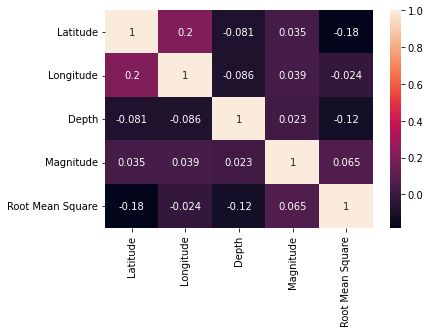

In [ ]:
import seaborn as sns
sns.heatmap(z,annot=True)


 3.Perform some aspects of exploration.
IN THIS HEATMAP WE CAN SAY THAT LESS DARK OR FAINT COLOUR IMPLIES MORE CORRELATION
BETWEEN EACH OTHER AND DARK IMPLIES LESS CORRELATION. THE CORRELATION WITH EACH
OTHER WILL ALWAYS BE HIGH.THE CORRELATION OF MAGNITUDE AND LONGITUDE IS BETTER THAN
OTHER BUT LESS THAN 50%. BUT WE CAN SAY ITS ACCURACY IS GOOD.BUT BETTER THAN OTHERS.

4.Visualize the count of Nuclear explosion by year and the maximum occurrence w.r to year :


In [ ]:
b=df1.shape[0]

In [ ]:
l2=[]
for i in range(b):
 x = df1.Date[i].split("/")
 l2.append(x[-1])
l2

['1965',
 '1965',
 '1965',
 '1965',
 '1965',
 '1965',
 '1965',
 '1965',
 '1965',
 '1965',
 '1965',
 '1965',
 '1965',
 '1965',
 '1965',
 '1965',
 '1965',
 '1965',
 '1965',
 '1965',
 '1965',
 '1965',
 '1965',
 '1965',
 '1965',
 '1965',
 '1965',
 '1965',
 '1965',
 '1965',
 '1965',
 '1965',
 '1965',
 '1965',
 '1965',
 '1965',
 '1965',
 '1965',
 '1965',
 '1965',
 '1965',
 '1965',
 '1965',
 '1965',
 '1965',
 '1965',
 '1965',
 '1965',
 '1965',
 '1965',
 '1965',
 '1965',
 '1965',
 '1965',
 '1965',
 '1965',
 '1965',
 '1965',
 '1965',
 '1965',
 '1965',
 '1965',
 '1965',
 '1965',
 '1965',
 '1965',
 '1965',
 '1965',
 '1965',
 '1965',
 '1965',
 '1965',
 '1965',
 '1965',
 '1965',
 '1965',
 '1965',
 '1965',
 '1965',
 '1965',
 '1965',
 '1965',
 '1965',
 '1965',
 '1965',
 '1965',
 '1965',
 '1965',
 '1965',
 '1965',
 '1965',
 '1965',
 '1965',
 '1965',
 '1965',
 '1965',
 '1965',
 '1965',
 '1965',
 '1965',
 '1965',
 '1965',
 '1965',
 '1965',
 '1965',
 '1965',
 '1965',
 '1965',
 '1965',
 '1965',
 '1965',
 

In [ ]:
df=pd.DataFrame(l2)
df.head()

,0
0,1965
1,1965
2,1965
3,1965
4,1965


In [ ]:
s=pd.concat([df1,df],axis=1)
s

,Date,Time,Latitude,Longitude,Type,Depth,Magnitude,Magnitude Type,Root Mean Square,ID,Source,Location Source,Magnitude Source,Status,0
0,02/01/1965,13:44:18,19.2460,145.6160,Earthquake,131.60,6.0,MW,1.022784,ISCGEM860706,ISCGEM,ISCGEM,ISCGEM,Automatic,1965
1,04/01/1965,11:29:49,1.8630,127.3520,Earthquake,80.00,5.8,MW,1.022784,ISCGEM860737,ISCGEM,ISCGEM,ISCGEM,Automatic,1965
2,05/01/1965,18:05:58,-20.5790,-173.9720,Earthquake,20.00,6.2,MW,1.022784,ISCGEM860762,ISCGEM,ISCGEM,ISCGEM,Automatic,1965
3,08/01/1965,18:49:43,-59.0760,-23.5570,Earthquake,15.00,5.8,MW,1.022784,ISCGEM860856,ISCGEM,ISCGEM,ISCGEM,Automatic,1965
4,09/01/1965,13:32:50,11.9380,126.4270,Earthquake,15.00,5.8,MW,1.022784,ISCGEM860890,ISCGEM,ISCGEM,ISCGEM,Automatic,1965
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23407,12/28/2016,8:22:12,38.3917,-118.8941,Earthquake,12.30,5.6,ML,0.189800,NN00570710,NN,NN,NN,Reviewed,2016
23408,12/28/2016,9:13:47,38.3777,-118.8957,Earthquake,8.80,5.5,ML,0.218700,NN00570744,NN,NN,NN,Reviewed,2016
23409,12/28/2016,12:38:51,36.9179,140.4262,Earthquake,10.00,5.9,MWW,1.520000,US10007NAF,US,US,US,Reviewed,2016
23410,12/29/2016,22:30:19,-9.0283,118.6639,Earthquake,79.00,6.3,MWW,1.430000,US10007NL0,US,US,US,Reviewed,2016


In [ ]:
s.rename(columns={0:'YEAR'},inplace=True)
s.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23412 entries, 0 to 23411
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Date              23412 non-null  object 
 1   Time              23412 non-null  object 
 2   Latitude          23412 non-null  float64
 3   Longitude         23412 non-null  float64
 4   Type              23412 non-null  object 
 5   Depth             23412 non-null  float64
 6   Magnitude         23412 non-null  float64
 7   Magnitude Type    23412 non-null  object 
 8   Root Mean Square  23412 non-null  float64
 9   ID                23412 non-null  object 
 10  Source            23412 non-null  object 
 11  Location Source   23412 non-null  object 
 12  Magnitude Source  23412 non-null  object 
 13  Status            23412 non-null  object 
 14  YEAR              23412 non-null  object 
dtypes: float64(5), object(10)
memory usage: 2.7+ MB


In [ ]:
d=s[s['Type']=='Nuclear Explosion']
d

,Date,Time,Latitude,Longitude,Type,Depth,Magnitude,Magnitude Type,Root Mean Square,ID,Source,Location Source,Magnitude Source,Status,YEAR
565,12/20/1966,15:30:01,37.302167,-116.408333,Nuclear Explosion,1.2,5.62,ML,0.86,CI3329931,CI,CI,CI,Reviewed,1966
897,04/26/1968,15:00:02,37.295333,-116.455667,Nuclear Explosion,1.2,5.63,ML,1.03,CI3342128,CI,CI,CI,Reviewed,1968
1129,12/19/1968,16:30:01,37.231500,-116.473667,Nuclear Explosion,1.4,5.52,ML,1.36,CI3342181,CI,CI,CI,Reviewed,1968
1380,09/16/1969,14:30:01,37.314167,-116.460667,Nuclear Explosion,1.2,5.82,ML,0.33,CI3326197,CI,CI,CI,Reviewed,1969
1532,03/26/1970,19:00:01,37.300500,-116.534167,Nuclear Explosion,1.2,5.54,ML,0.35,CI3325031,CI,CI,CI,Reviewed,1970
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11963,10/06/1994,6:25:58,41.527000,88.710000,Nuclear Explosion,0.0,5.80,MB,0.90,USP0006E1A,US,US,US,Reviewed,1994
12142,07/10/1994,3:25:58,41.662000,88.753000,Nuclear Explosion,0.0,6.00,MB,0.90,USP0006KQC,US,US,US,Reviewed,1994
12450,05/15/1995,4:05:58,41.603000,88.820000,Nuclear Explosion,0.0,6.10,MB,1.00,USP0006XCY,US,US,US,Reviewed,1995
12613,08/17/1995,0:59:58,41.559000,88.800000,Nuclear Explosion,0.0,6.00,MB,0.90,USP00071XV,US,US,US,Reviewed,1995


In [ ]:
c=d[['Type','YEAR']].groupby('YEAR').count()
c

,Type
YEAR,
1966,1
1968,2
1969,1
1970,1
1973,6
1974,6
1975,9
1976,10
1977,8


In [ ]:
c.index

Index(['1966', '1968', '1969', '1970', '1973', '1974', '1975', '1976', '1977',
       '1978', '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986',
       '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995',
       '1996'],
      dtype='object', name='YEAR')

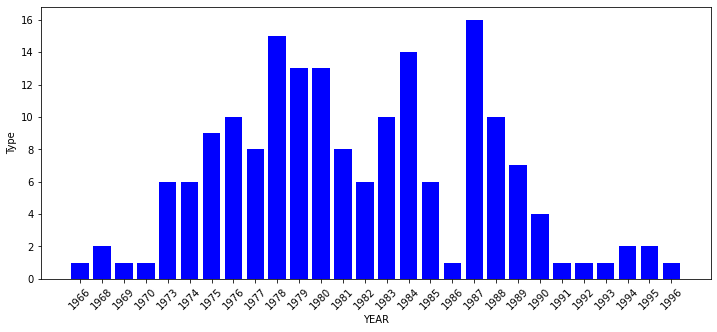

In [ ]:
plt.figure(figsize=(12,5))
plt.bar(c.index,c['Type'],color='b')
plt.xlabel('YEAR')
plt.xticks(rotation=45)
plt.ylabel('Type')
plt.show()


5. Visualize the count w.r.t Source, Type and Magnitude Source.


In [ ]:
import seaborn as sns

In [ ]:
df1.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23412 entries, 0 to 23411
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Date              23412 non-null  object 
 1   Time              23412 non-null  object 
 2   Latitude          23412 non-null  float64
 3   Longitude         23412 non-null  float64
 4   Type              23412 non-null  object 
 5   Depth             23412 non-null  float64
 6   Magnitude         23412 non-null  float64
 7   Magnitude Type    23412 non-null  object 
 8   Root Mean Square  23412 non-null  float64
 9   ID                23412 non-null  object 
 10  Source            23412 non-null  object 
 11  Location Source   23412 non-null  object 
 12  Magnitude Source  23412 non-null  object 
 13  Status            23412 non-null  object 
dtypes: float64(5), object(9)
memory usage: 2.5+ MB


In [ ]:
df1['Source'].value_counts()

US           20630
ISCGEM        2460
ISCGEMSUP      120
CI              61
GCMT            55
NC              51
AK              12
OFFICIAL         8
UW               6
NN               4
ATLAS            3
SE               1
PR               1
Name: Source, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


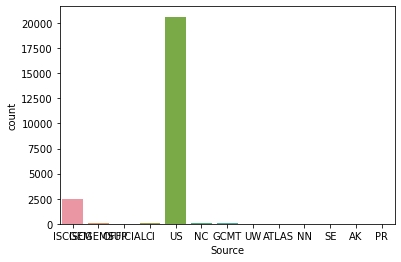

In [ ]:
sns.countplot(df1['Source'])


In [ ]:
df1['Type'].value_counts()

Earthquake           23232
Nuclear Explosion      175
Explosion                4
Rock Burst               1
Name: Type, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


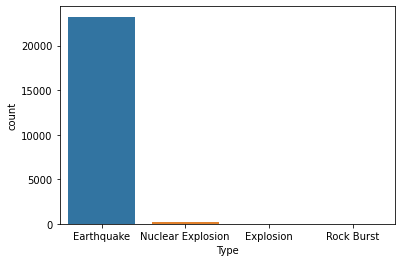

In [ ]:
sns.countplot(df1['Type'])

In [ ]:
df1['Magnitude Source'].value_counts()

US          10458
HRV          8223
ISCGEM       2580
GCMT         1489
NC            533
CI             61
AK             12
PAR             9
OFFICIAL        8
UW              6
GUC             6
NIED            4
NN              4
1000            3
US_GCMT         3
ATLAS           3
BRK             2
PGC             2
1023            1
1009            1
SE              1
US_PGC          1
1020            1
PR              1
Name: Magnitude Source, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


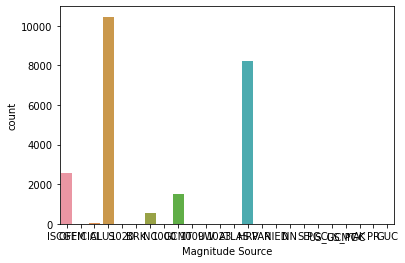

In [ ]:
sns.countplot(df1['Magnitude Source'])